### Import dataset

In [159]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [160]:
np.random.seed(42)
df = pd.read_csv('churn_dataset.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [161]:
df.replace({"Yes": 1, "True": 1, "No": 0, "False": 0}, inplace=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [163]:
# Separating features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Excluding non-numeric features for the current analysis
numeric_features = X.select_dtypes(include=[np.number])

# Recalculating Information Gain
info_gain_numeric = mutual_info_classif(numeric_features, y, discrete_features='auto')

# Create a DataFrame for Information Gain for numeric features
info_gain_df_numeric = pd.DataFrame({'Feature': numeric_features.columns, 'Information Gain': info_gain_numeric})

# Recalculating Correlation for numeric features
correlation_numeric = numeric_features.apply(lambda x: x.corr(y))

# Create a DataFrame for Correlation for numeric features
correlation_df_numeric = pd.DataFrame({'Feature': numeric_features.columns, 'Correlation': np.abs(correlation_numeric)})

# Merging the two DataFrames on Feature for numeric features
feature_ranking_numeric = pd.merge(info_gain_df_numeric, correlation_df_numeric, on='Feature')

# Sorting the DataFrame based on Information Gain and Correlation for numeric features
feature_ranking_numeric.sort_values(by=['Information Gain', 'Correlation'], ascending=False, inplace=True)

feature_ranking_numeric.reset_index(drop=True, inplace=True)

feature_ranking_numeric



,Feature,Information Gain,Correlation
0,Total day minutes,0.054456,0.205151
1,Total day charge,0.051735,0.205151
2,Customer service calls,0.038042,0.208750
3,International plan,0.023663,0.259852
4,Number vmail messages,0.010412,0.089728
5,Total intl minutes,0.010018,0.068239
6,Area code,0.006019,0.006174
7,Total night charge,0.005234,0.035496
8,Voice mail plan,0.003154,0.102148
9,Total night minutes,0.002755,0.035493


In [164]:
# # Eliminating features with 0 Information Gain
# feature_ranking_filtered = feature_ranking_numeric[(feature_ranking_numeric['Correlation'] > 0.01) | (feature_ranking_numeric['Information Gain'] > 0)]

# feature_ranking_filtered.reset_index(drop=True, inplace=True)
# feature_ranking_filtered['Feature'].values

array(['Total day minutes', 'Total day charge', 'Customer service calls',
       'International plan', 'Number vmail messages',
       'Total intl minutes', 'Area code', 'Total night charge',
       'Voice mail plan', 'Total night minutes', 'Account length',
       'Total day calls', 'Total eve minutes', 'Total eve charge',
       'Total intl charge', 'Total intl calls'], dtype=object)

In [165]:
# X = numeric_features.drop(columns=[col for col in numeric_features.columns if col not in feature_ranking_filtered['Feature'].values])
# X

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2
3329,68,415,0,0,0,231.1,57,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3
3330,28,510,0,0,0,180.8,109,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2
3331,184,510,1,0,0,213.8,105,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2


In [166]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(pd.get_dummies(numeric_features))

# Converting the standardized features back to a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=numeric_features.columns)

# Displaying the first few rows of the standardized features
X_standardized_df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [ ]:

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

### Random Forest

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5

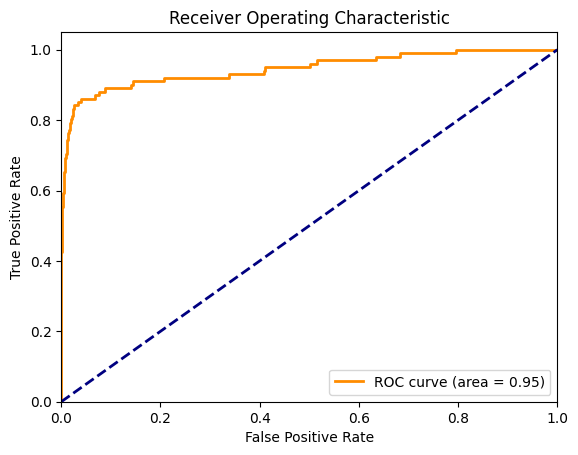

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       566
        True       0.91      0.70      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.85      0.88       667
weighted avg       0.94      0.94      0.94       667

confusion_matrix:  [[559   7]
 [ 30  71]]
ROC area:  0.9462267781548473


In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)
# Train the Random Forest Classifier using the best parameters
rf_classifier_best = RandomForestClassifier(**best_params, random_state=42)
rf_classifier_best.fit(X_train, y_train)

# Predicting the test set results
y_pred = rf_classifier_best.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve and AUC
y_pred_prob = rf_classifier_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(classification_rep)
print("confusion_matrix: ", conf_matrix)
print("ROC area: ", roc_auc)


### Deep Learning

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=len(X_standardized_df.columns), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100


84/84 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8282 - val_loss: 0.4964 - val_accuracy: 0.8456
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4630 - accuracy: 0.8560 - val_loss: 0.4528 - val_accuracy: 0.8486
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8567 - val_loss: 0.4312 - val_accuracy: 0.8486
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8567 - val_loss: 0.4168 - val_accuracy: 0.8486
Epoch 5/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8567 - val_loss: 0.4053 - val_accuracy: 0.8486
Epoch 6/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8567 - val_loss: 0.3957 - val_accuracy: 0.8486
Epoch 7/100
84/84 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8567 - val_loss: 0.3871 - val_accuracy: 0.8486
Epoch 8/100
84/84 [======

21/21 [==============================] - 0s 394us/step


Confusion Matrix:
[[555  11]
 [ 40  61]]
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.98      0.96       566
        True       0.85      0.60      0.71       101

    accuracy                           0.92       667
   macro avg       0.89      0.79      0.83       667
weighted avg       0.92      0.92      0.92       667



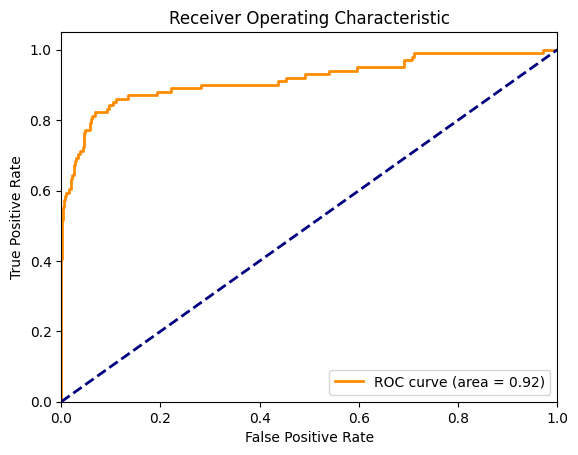

In [187]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mtx)
print("Classification Report:")
print(classification_rep)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Training Accuracy: 0.936609148979187
Training Loss: 0.19818705320358276
Validation Accuracy: 0.9235382080078125
Validation Loss: 0.21350090205669403


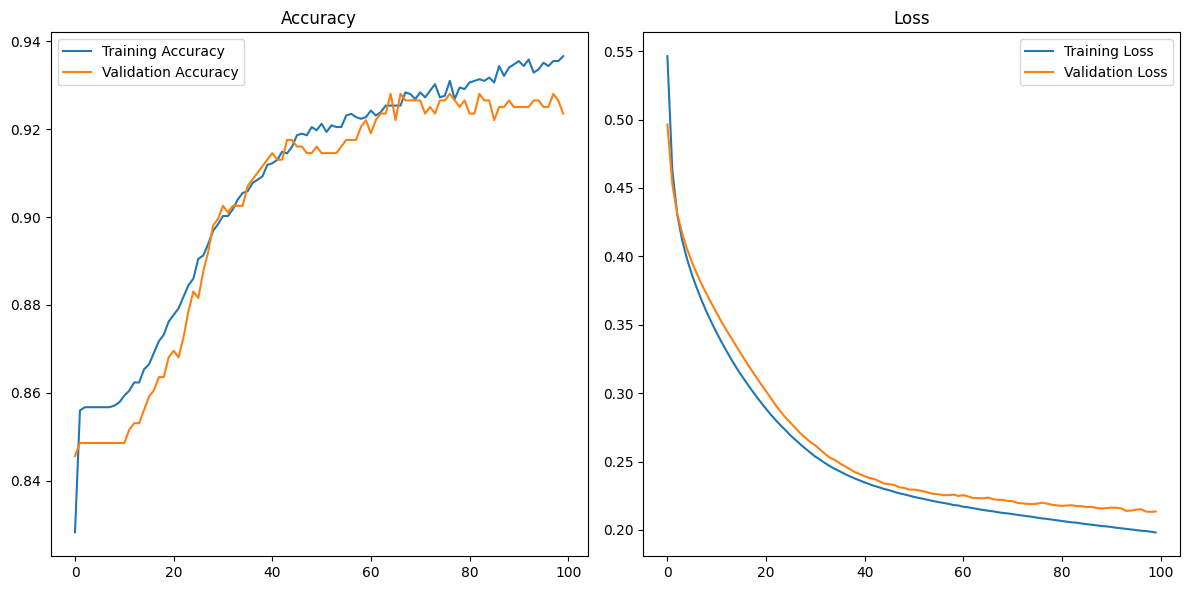

In [188]:

# Print the accuracy and loss
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

print(f'Training Accuracy: {train_acc[-1]}')
print(f'Training Loss: {train_loss[-1]}')
print(f'Validation Accuracy: {val_acc[-1]}')
print(f'Validation Loss: {val_loss[-1]}')

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot the loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
